Before you begin, make sure you have all the necessary libraries installed.

In this quickstart, we run two controllers to actively manipulate the flow of fluid passing a cylinder, utilizing a synthetic jet as a means of control:

- open-loop active flow control using a sinusoidal signal: `open_loop_sinusoidal_controller.py`
- closed-loop active flow control using a pre-trained deep neural network: `closed_loop_ppo_controller.py` 

The aim of the controller is to minimize the drag coefficient on the cylinder while keeping the lift forces as low as possible.

## Run Quickstart

The baseline scenario where no control is applied (please ensure that you substitute `/usr/lib/openfoam/openfoam2112/etc/bashrc` with the path of the OpenFOAM bashrc that is accessible in your system):

In [2]:
from os import system
_ = system(". /usr/lib/openfoam/openfoam2112/etc/bashrc && python3 -u ./baseline.py")

No protocol specified



...
The baseline case (no-controll) is running!
This task is expected to be completed in about 5 minutes on a system with two cores @ 2.10GHz.
...

The baseline case is done.


Closed-loop active flow control using a pre-trained deep neural network, which has been trained using our framework `gymprecice` (please ensure that you substitute `/usr/lib/openfoam/openfoam2112/etc/bashrc` with the path of the OpenFOAM bashrc that is accessible in your system):

In [1]:
from os import system
_ = system(". /usr/lib/openfoam/openfoam2112/etc/bashrc && python3 -u ./closed_loop_ppo_controller.py")

No protocol specified



...
The control case is running!
This task is expected to be completed in about 5 minutes on a system with two cores @ 2.10GHz.
...

The control case is done.


Open-loop active flow control using a pre-defined sinusoidal signel (please ensure that you substitute `/usr/lib/openfoam/openfoam2112/etc/bashrc` with the path of the OpenFOAM bashrc that is accessible in your system). 

Note: It is not anticipated that the sinusoidal signal would be able to attain the control objective:

In [3]:
from os import system
_ = system(". /usr/lib/openfoam/openfoam2112/etc/bashrc && python3 -u ./open_loop_sinusoidal_controller.py")

No protocol specified



...
The control case is running!
This task is expected to be completed in about 5 minutes on a system with two cores @ 2.10GHz.
...

The control case is done.


## Compare the results

Plots of jets' flow-rate (control signal profile):

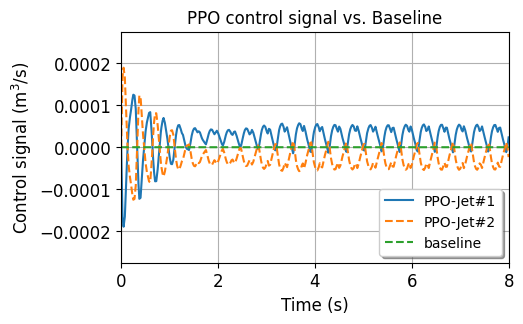

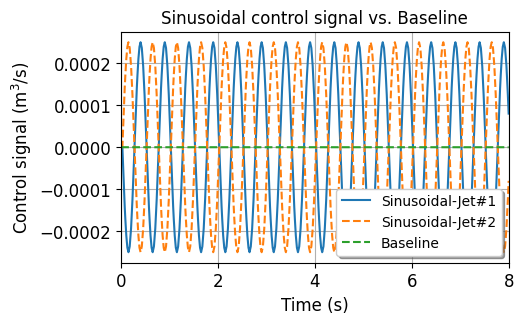

In [4]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

baseline_case = "./gymprecice-run/jet_cylinder_2d_baseline/env_0/fluid-openfoam"
ppo_case = "./gymprecice-run/jet_cylinder_2d_ppo/env_0/fluid-openfoam"
sinusoidal_case = "./gymprecice-run/jet_cylinder_2d_sinusoidal/env_0/fluid-openfoam"

# control signal information for the baseline (nothing but zero values, read as ckeck!)
baseline_jet1_file = path.join(baseline_case, "postProcessing/flowRateJet1/0/surfaceFieldValue.dat")
baseline_jet1 = np.loadtxt(baseline_jet1_file, unpack=True, usecols=[0, 1])
baseline_jet2_file = path.join(baseline_case, "postProcessing/flowRateJet2/0/surfaceFieldValue.dat")
baseline_jet2 = np.loadtxt(baseline_jet2_file, unpack=True, usecols=[0, 1])

# control signal information for the ppo controller
ppo_jet1_file = path.join(ppo_case, "postProcessing/flowRateJet1/0/surfaceFieldValue.dat")
ppo_jet1 = np.loadtxt(ppo_jet1_file, unpack=True, usecols=[0, 1])
ppo_jet2_file = path.join(ppo_case, "postProcessing/flowRateJet2/0/surfaceFieldValue.dat")
ppo_jet2 = np.loadtxt(ppo_jet2_file, unpack=True, usecols=[0, 1])

# control signal information for the sinusoidal controller
sinusoidal_jet1_file = path.join(sinusoidal_case, "postProcessing/flowRateJet1/0/surfaceFieldValue.dat")
sinusoidal_jet1 = np.loadtxt(sinusoidal_jet1_file, unpack=True, usecols=[0, 1])
sinusoidal_jet2_file = path.join(sinusoidal_case, "postProcessing/flowRateJet2/0/surfaceFieldValue.dat")
sinusoidal_jet2 = np.loadtxt(sinusoidal_jet2_file, unpack=True, usecols=[0, 1])

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_xlim((0, 8))
ax.set_ylim((-2.75e-4, 2.75e-4))
ax.set_ylabel("Control signal (m$^3$/s)", fontsize=12)
ax.set_xlabel("Time (s)", fontsize=12)
ax.tick_params(labelsize=12)
plt.title("PPO control signal vs. Baseline")
plt.grid()
ax.plot(ppo_jet1[0], ppo_jet1[1], label='PPO-Jet#1')
ax.plot(ppo_jet2[0], ppo_jet2[1],linestyle='dashed', label='PPO-Jet#2')
ax.plot(baseline_jet2[0], baseline_jet2[1],linestyle='dashed', label='baseline')
ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=True, fontsize=10)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_xlim((0, 8))
ax.set_ylim((-2.75e-4, 2.75e-4))
ax.set_ylabel("Control signal (m$^3$/s)", fontsize=12)
ax.set_xlabel("Time (s)", fontsize=12)
ax.tick_params(labelsize=12)
plt.grid()
plt.title("Sinusoidal control signal vs. Baseline")
ax.plot(sinusoidal_jet1[0], sinusoidal_jet1[1], label='Sinusoidal-Jet#1')
ax.plot(sinusoidal_jet2[0], sinusoidal_jet2[1],linestyle='dashed', label='Sinusoidal-Jet#2')
ax.plot(baseline_jet2[0], baseline_jet2[1],linestyle='dashed', label='Baseline')
ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=True, fontsize=10)


Plots of Drag and Lift coefficients (control response profile):

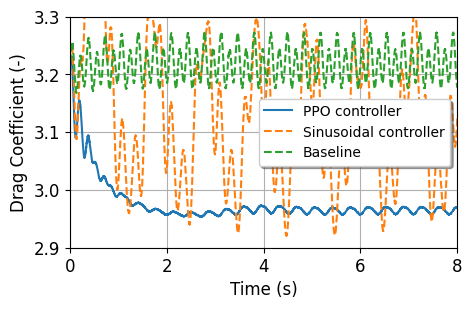

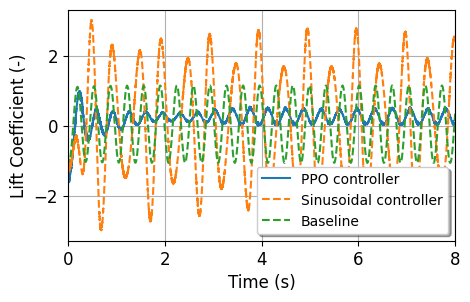

In [5]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

baseline_case = "./gymprecice-run/jet_cylinder_2d_baseline/env_0/fluid-openfoam"
ppo_case = "./gymprecice-run/jet_cylinder_2d_ppo/env_0/fluid-openfoam"
sinusoidal_case = "./gymprecice-run/jet_cylinder_2d_sinusoidal/env_0/fluid-openfoam"

# control response information for the baseline (nothing but zero values, read as ckeck!)
baseline_forces_file = path.join(baseline_case, "postProcessing/forceCoeffs/0/coefficient.dat")
baseline_forces = np.loadtxt(baseline_forces_file, unpack=True, usecols=[0, 1, 3])

# control response information for the ppo controller
ppo_forces_file = path.join(ppo_case, "postProcessing/forceCoeffs/0/coefficient.dat")
ppo_forces = np.loadtxt(ppo_forces_file, unpack=True, usecols=[0, 1, 3])

# control response information for the sinusoidal controller
sinusoidal_forces_file = path.join(sinusoidal_case, "postProcessing/forceCoeffs/0/coefficient.dat")
sinusoidal_forces = np.loadtxt(sinusoidal_forces_file, unpack=True, usecols=[0, 1, 3])


fig, ax = plt.subplots(figsize=(5, 3))
ax.set_xlim((0, 8))
ax.set_ylim((2.9, 3.3))
ax.set_ylabel("Drag Coefficient (-)", fontsize=12)
ax.set_xlabel("Time (s)", fontsize=12)
ax.tick_params(labelsize=12)
plt.grid()
ax.plot(ppo_forces[0], ppo_forces[1], label='PPO controller')
ax.plot(sinusoidal_forces[0], sinusoidal_forces[1],linestyle='dashed', label='Sinusoidal controller')
ax.plot(baseline_forces[0], baseline_forces[1],linestyle='dashed', label='Baseline')
ax.legend(loc='center right', ncol=1, fancybox=True, shadow=True, fontsize=10)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_xlim((0, 8))
#ax.set_ylim((2.9, 3.3))
ax.set_ylabel("Lift Coefficient (-)", fontsize=12)
ax.set_xlabel("Time (s)", fontsize=12)
ax.tick_params(labelsize=12)
plt.grid()
ax.plot(ppo_forces[0], ppo_forces[2], label='PPO controller')
ax.plot(sinusoidal_forces[0], sinusoidal_forces[2],linestyle='dashed', label='Sinusoidal controller')
ax.plot(baseline_forces[0], baseline_forces[2],linestyle='dashed', label='Baseline')
ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=True, fontsize=10)